In [1]:
import requests
import shutil
from bs4 import BeautifulSoup
import pandas as pd


class MusinsaScraper:
    def __init__(self, query):
        self.query = query
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        self.url = "https://www.musinsa.com/search/musinsa/integration?q=" + self.query

    def scrape(self):
        response = requests.get(self.url, headers=self.headers)
        soup = BeautifulSoup(response.text, 'lxml')

        result = []
        image_urls = []  # 이미지 URL을 저장할 리스트 생성

        goods_links = soup.find_all('a', attrs={'name': 'goods_link'})
        prices = soup.find_all('p', attrs={'class': 'price'})
        images = soup.find_all('img', attrs={'class': 'lazyload lazy'})

        for link, price, image in zip(goods_links, prices, images):
            title = link.get('title')
            price_text = price.find('del')

            if price_text is not None:
                price_text.extract()

            price_text = price.text.strip().replace('원', '').replace(',', '')
            link = link.get('href')
            image_url = image.get('data-original')

            if image_url.startswith('//'):
                image_url = 'https:' + image_url

            result.append((title, price_text, link))
            image_urls.append(image_url)  # 이미지 URL을 리스트에 추가

        df = pd.DataFrame(result, columns=['Product_Name', 'Price', 'Product_Link'])
        df['Price'] = df['Price'].str.replace(',', '').astype(int)

        for index, image_url in enumerate(image_urls):
            filename = f"image_{index}.jpg"  # 이미지 파일 이름을 인덱스에 따라 지정
            self.download_image(image_url, filename)

        return df

    def download_image(self, url, filename):
        response = requests.get(url, stream=True)
        with open(filename, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response

In [2]:
# 사용 예시
query = '눕시'
scraper = MusinsaScraper(query)
df = scraper.scrape()

In [3]:
df

,Product_Name,Price,Product_Link
0,NJ1DQ55A 남성 1996 에코 눕시 자켓,399000,https://www.musinsa.com/app/goods/2482269
1,NJ1DQ55A 남성 1996 에코 눕시 자켓,399000,https://www.musinsa.com/app/goods/2482269
2,NJ1DQ85A 여성 1996 에코 눕시 자켓,368000,https://www.musinsa.com/app/goods/3490942
3,NJ1DQ85A 여성 1996 에코 눕시 자켓,288000,https://www.musinsa.com/app/goods/3490942
4,NJ1DQ80M 여성 노벨티 눕시 다운 자켓,388000,https://www.musinsa.com/app/goods/3484720
5,NJ1DQ80M 여성 노벨티 눕시 다운 자켓,399000,https://www.musinsa.com/app/goods/3484720
6,키즈 1996 에코 눕시 다운 자켓 NJ1DQ53T_BLK,399000,https://www.musinsa.com/app/goods/3443145
7,키즈 1996 에코 눕시 다운 자켓 NJ1DQ53T_BLK,388000,https://www.musinsa.com/app/goods/3443145
8,NJ1DP87J 화이트라벨 여성 노벨티 눕시 다운 자켓 SE,459000,https://www.musinsa.com/app/goods/3678518
9,NJ1DP87J 화이트라벨 여성 노벨티 눕시 다운 자켓 SE,399000,https://www.musinsa.com/app/goods/3678518


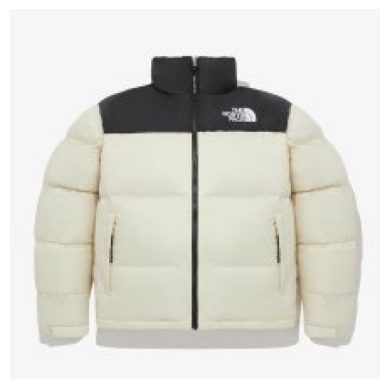

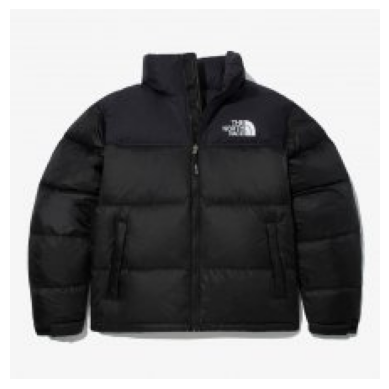

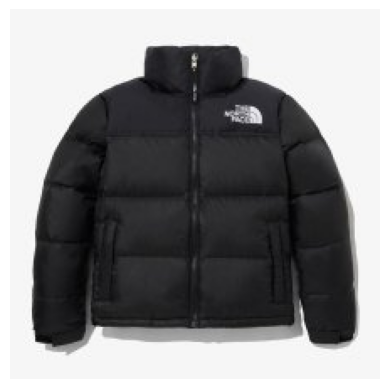

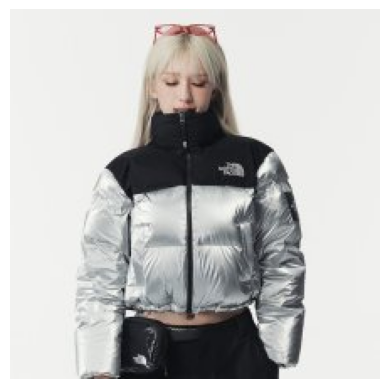

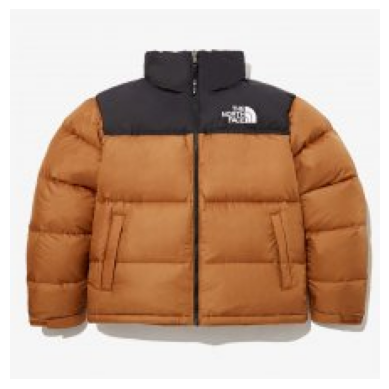

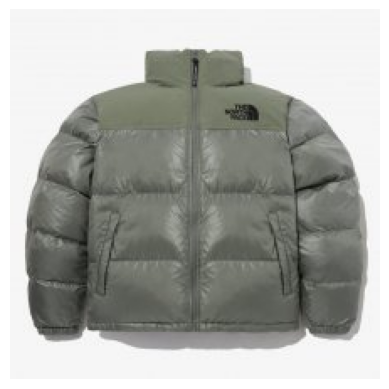

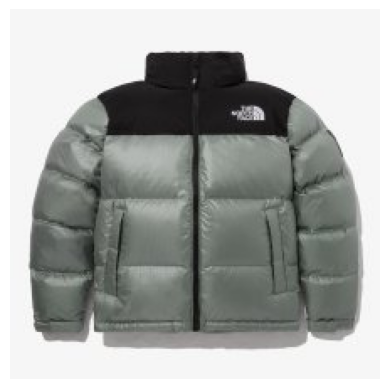

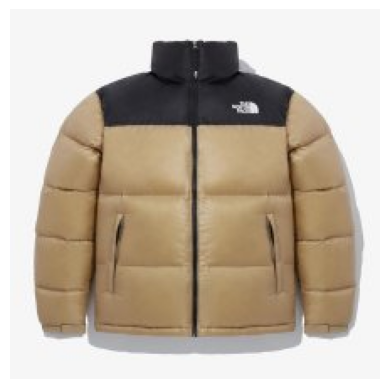

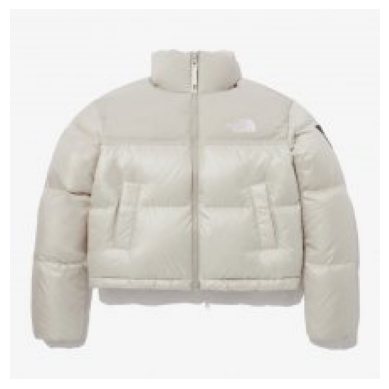

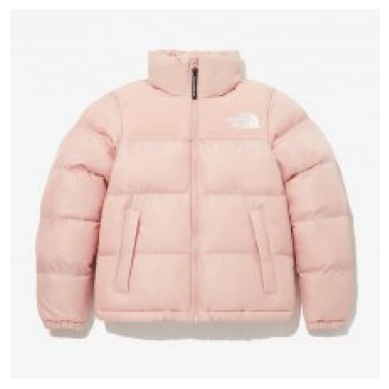

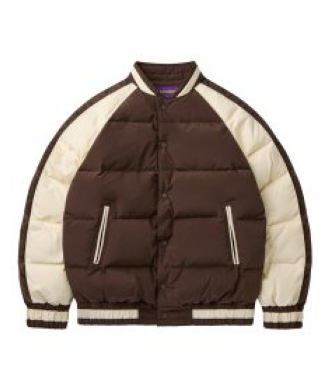

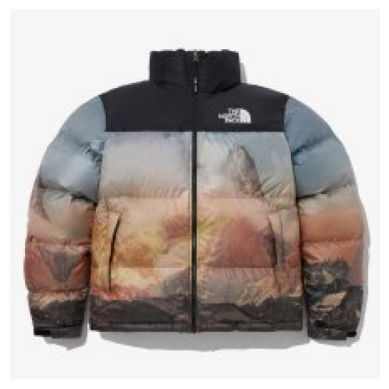

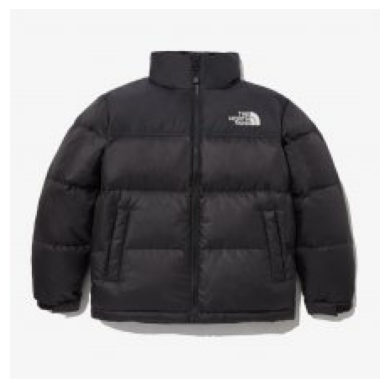

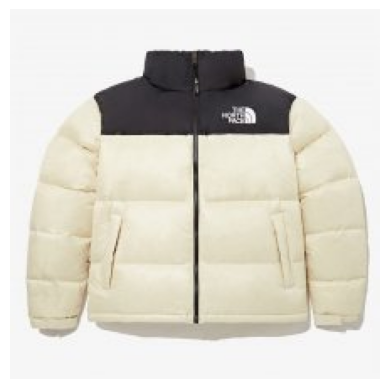

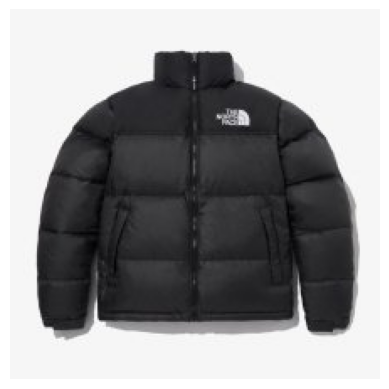

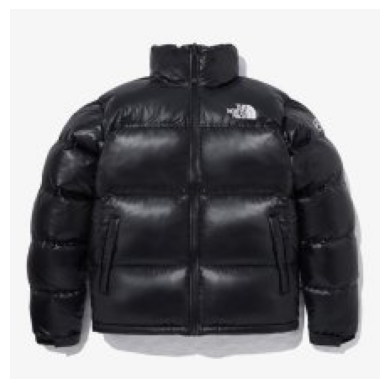

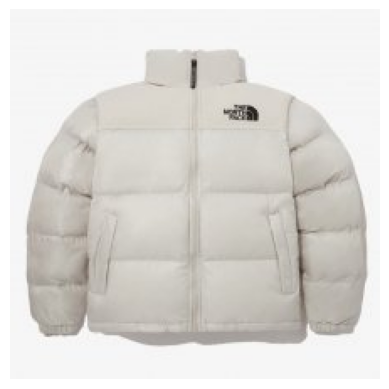

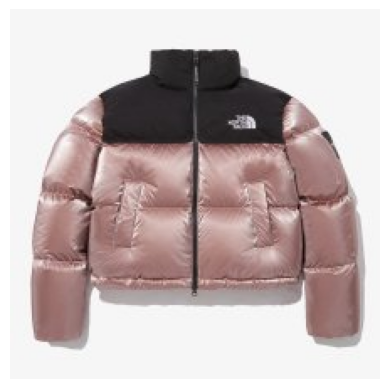

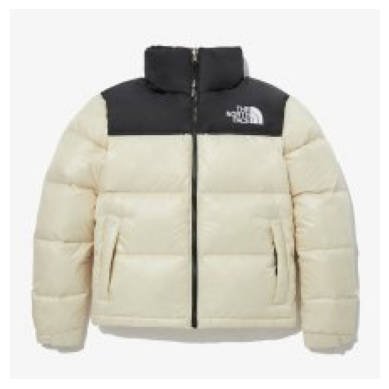

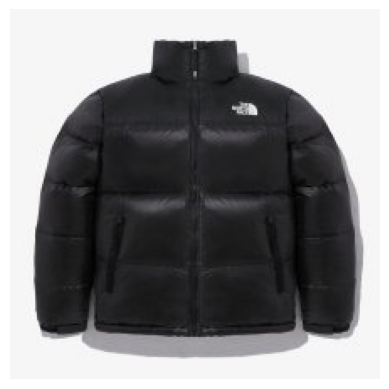

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 이미지 파일이 저장된 디렉토리 경로
image_directory = "/content"

# 이미지 파일들의 경로를 리스트로 저장
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# 이미지 파일들을 순회하며 보여주기
for image_file in image_files:
    show_image(image_file)